In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
# Read the data
data = pd.read_csv('train_data.csv')


In [4]:
# Glympse of data

data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [5]:
data.shape        # dimension of data

(76529, 11)

In [6]:
data.info()         # dtypes and no. of data points present in that specific column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


### Insights:

1. We do not have any Missing Values
2. Transaction_initiation column should be a datatime Datatype.


In [7]:
# transaction_number , user_id and partner_id should be categorical type
# Transaction_initiation column should be a datatime Datatype. 

data['transaction_number'] = data['transaction_number'].astype('category')
data['user_id'] = data['user_id'].astype('category')
data['partner_id'] = data['partner_id'].astype('category')
data['transaction_initiation'] = pd.to_datetime(data['transaction_initiation'])

In [8]:
data['transaction_initiation'].dtype

datetime64[ns, UTC]

In [9]:
data['Year'] = data['transaction_initiation'].dt.year
data['Month'] = data['transaction_initiation'].dt.month
data['Day'] = data['transaction_initiation'].dt.day
data['Hour'] = data['transaction_initiation'].dt.hour
data['Day_of_week'] = data['transaction_initiation'].dt.day_name()

In [10]:
data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Year,Month,Day,Hour,Day_of_week
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016,11,15,19,Tuesday
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017,1,11,9,Wednesday
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016,12,7,7,Wednesday
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017,1,11,16,Wednesday
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016,11,16,17,Wednesday


In [11]:
data.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
Year                            2
Month                           4
Day                            31
Hour                           24
Day_of_week                     7
dtype: int64

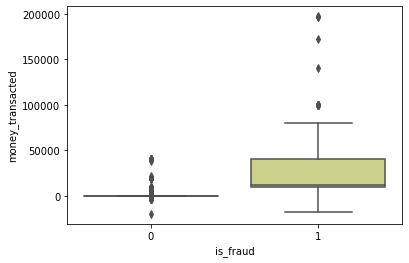

In [12]:
sns.boxplot(x="is_fraud", y="money_transacted", data=data,palette='rainbow')

### Insights(from tranining data) :

* Any transaction above 50,000 is a fraudulent transactions.

In [13]:
# def barplot(x,df):
#     bar_plot1 = sns.barplot(x=x, data=df, order = df[x].value_counts().index)
#     for p in bar_plot1.patches:
#         height = p.get_height()
#         bar_plot1.text(p.get_x()+ p.get_width()/2, height + 1, height)

In [14]:
def countplot(x,df):
    bar_plot1 = sns.countplot(x=x, data=df, order = df[x].value_counts().index)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 1, height)

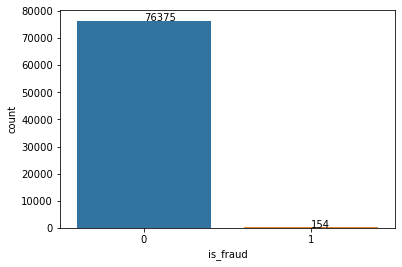

In [15]:
countplot("is_fraud", data)
# data.plot(x = 'is_fraud', stacked = True, title = 'Stacked Bar Graph', mark_right = True)

### Insights / patterns observed from the visualizations

* We only have 154 fraud transactions in training data

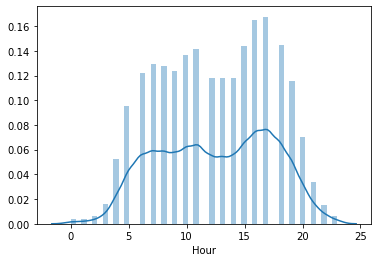

In [16]:
sns.distplot(data['Hour'], kde = True)

### Insights:

* Most of the transactions are happening between 8-9 in the morning and 3-4 PM in the afternoon 

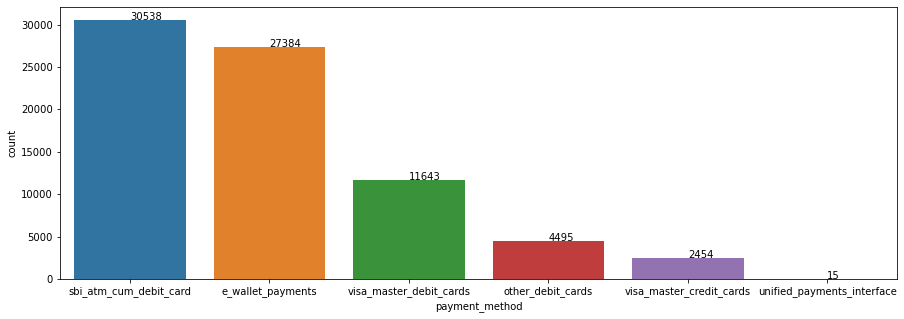

In [17]:
plt.figure(figsize=(15,5))
countplot(x='payment_method',df=data)

## Lets seperate fraud and non fraud data

In [18]:
# Data where (is_fraud == 0)

non_fraud_data = data[data['is_fraud'] == 0]
non_fraud_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Year,Month,Day,Hour,Day_of_week
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016,11,15,19,Tuesday
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017,1,11,9,Wednesday
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016,12,7,7,Wednesday
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017,1,11,16,Wednesday
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016,11,16,17,Wednesday


In [19]:
# Data where (is_fraud == 1)

fraud_data = data[data['is_fraud'] == 1]
fraud_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Year,Month,Day,Hour,Day_of_week
196,631960043718375,1695204,visa_master_credit_cards,118335,cat_1,IND_INR,other_pcs,40000.0,2017-01-18 15:09:59+00:00,2,1,2017,1,18,15,Wednesday
571,2425548625856,7054336,visa_master_credit_cards,118335,cat_1,IND_INR,windows_pcs,6000.0,2017-01-24 00:44:25+00:00,2,1,2017,1,24,0,Tuesday
1267,641842338376,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,10000.0,2016-12-04 12:22:20+00:00,0,1,2016,12,4,12,Sunday
1420,298707250627423,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,60000.0,2016-12-04 12:20:07+00:00,0,1,2016,12,4,12,Sunday
1811,1165348588684337,25542916,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,10000.0,2016-12-28 08:17:21+00:00,4,1,2016,12,28,8,Wednesday


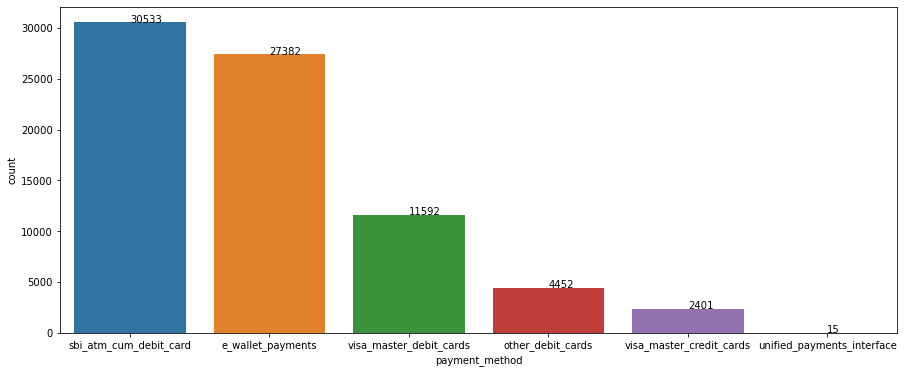

In [20]:
# Count of Non fraud transactions for each payment method

plt.figure(figsize=(15,6))
countplot(x='payment_method',df=non_fraud_data)

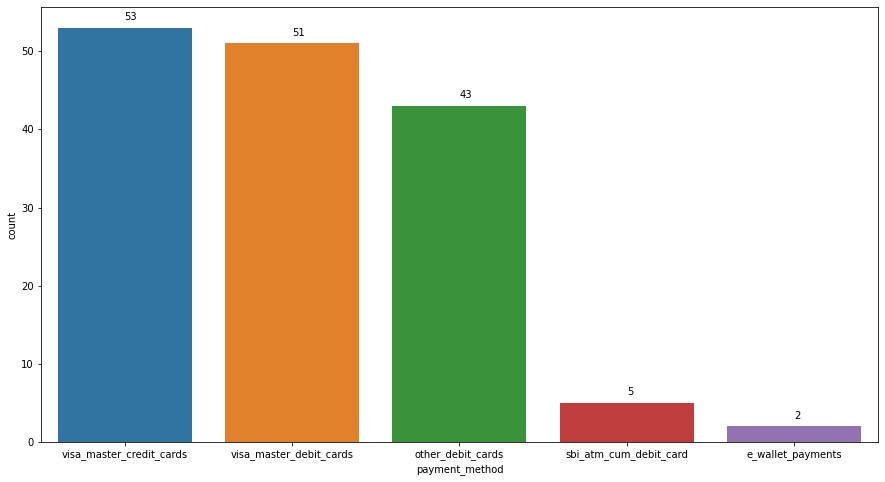

In [21]:
# total count of fraud transaction for each payment method

plt.figure(figsize=(15,8))
countplot(x='payment_method',df=fraud_data)

In [22]:
import math


payment = pd.crosstab(data['payment_method'], data['is_fraud'])
payment['fraud / total transactions'] = round(payment[0]/payment[1])
payment

is_fraud,0,1,fraud / total transactions
payment_method,,,
e_wallet_payments,27382,2,13691.0
other_debit_cards,4452,43,104.0
sbi_atm_cum_debit_card,30533,5,6107.0
unified_payments_interface,15,0,inf
visa_master_credit_cards,2401,53,45.0
visa_master_debit_cards,11592,51,227.0


### Insights :

* `visa_master_credit_cards` column has highest count of Fraud Transactions
* `1` out of every `45` `credit card transaction` is a fraudulent transaction. 
* `visa_master_debit_cards` column has the secound highest count of fraud Transactions.
* `other_debit_cards` column has the third highest count of fraud Transactions.
* `sbi_atm_cum_debit_card` are safer than the `other_debit_cards` in terms of fraud prevention.
* `e_wallet_payments` are one of the safest mode of payments.


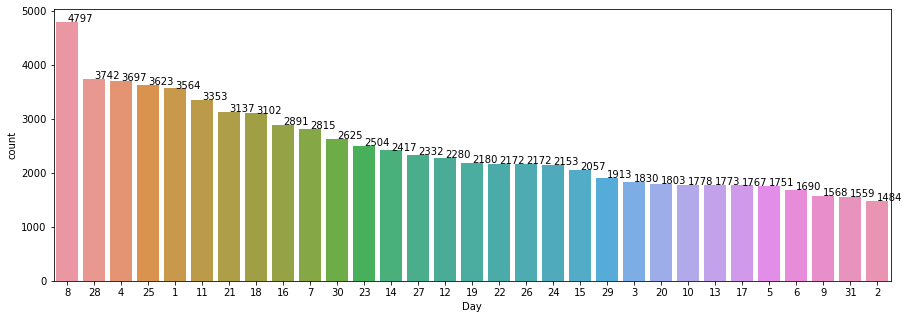

In [23]:
plt.figure(figsize=(15,5))
countplot(x='Day',df=data)

### Insights :

* On average per day there are more than 1500 transactions.
* Most of the trnasactions (highest peak) can be seen on 8th day of the month.

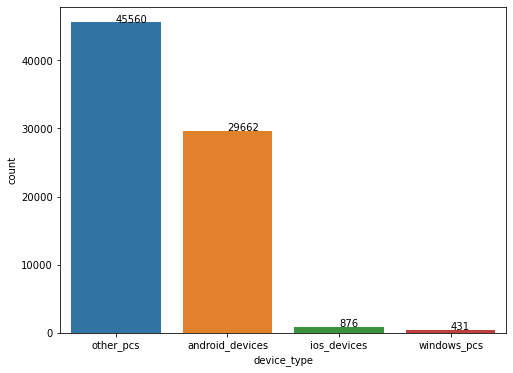

In [24]:
plt.figure(figsize=(8,6))
countplot('device_type', df = data)

In [25]:
pd.crosstab(data.device_type, data['is_fraud'])

is_fraud,0,1
device_type,,
android_devices,29657,5
ios_devices,876,0
other_pcs,45415,145
windows_pcs,427,4


### Insights:

* * `'Other PC's` are being used by the fraudster to commit fraud
* `ios_devices` shows no fraud has been committed using these devices hence we can say they are the most safest devices.
* `android_devices` are one of most popular devices used by customers.

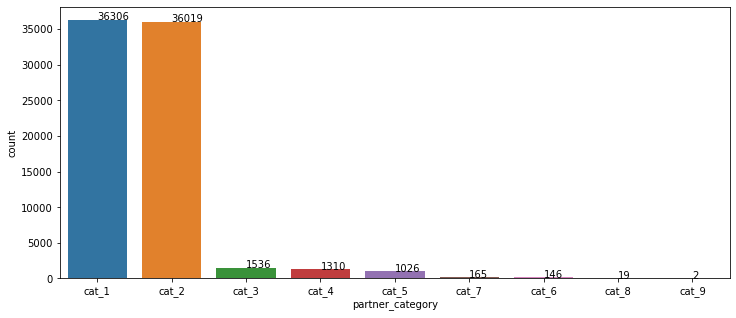

In [26]:
plt.figure(figsize=(12,5))
countplot('partner_category', df = data)

### Insights:

* cat_1 and cat_2 are the mostly used categories

In [27]:
pd.crosstab(data.partner_category, data['is_fraud'])

is_fraud,0,1
partner_category,,
cat_1,36178,128
cat_2,36004,15
cat_3,1527,9
cat_4,1310,0
cat_5,1026,0
cat_6,146,0
cat_7,165,0
cat_8,17,2
cat_9,2,0


### Insights

* Most of the fraud transactions are in `cat_1` of `partner_category`


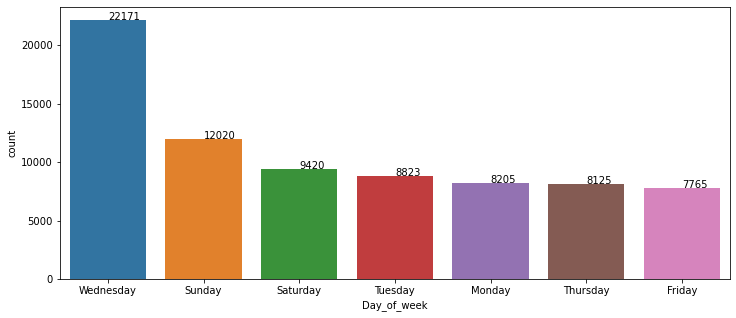

In [28]:
plt.figure(figsize=(12,5))
countplot('Day_of_week', df = data)

In [29]:
pd.crosstab(data.Day_of_week, data['is_fraud'])

is_fraud,0,1
Day_of_week,,
Friday,7752,13
Monday,8186,19
Saturday,9396,24
Sunday,11995,25
Thursday,8102,23
Tuesday,8795,28
Wednesday,22149,22


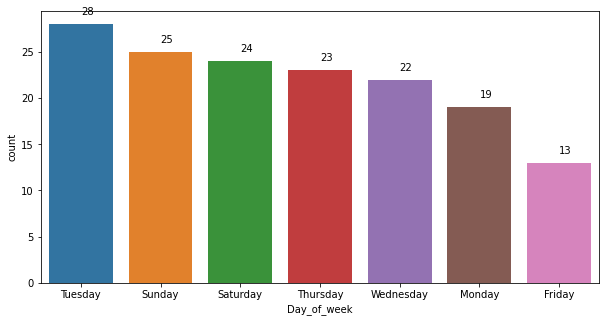

In [30]:
plt.figure(figsize=(10,5))
countplot(x='Day_of_week',df=fraud_data)

In [31]:
pd.crosstab(data.Month, data['is_fraud'])

is_fraud,0,1
Month,,
1,25295,50
2,12578,43
11,10004,11
12,28498,50


In [32]:
pd.crosstab(data.Year, data['is_fraud'])

is_fraud,0,1
Year,,
2016,38502,61
2017,37873,93


In [33]:
pd.crosstab(data.Hour, data['is_fraud'])

is_fraud,0,1
Hour,,
0,132,1
1,141,0
2,231,0
3,569,6
4,1841,0
5,3364,5
6,4284,6
7,4534,9
8,4505,4


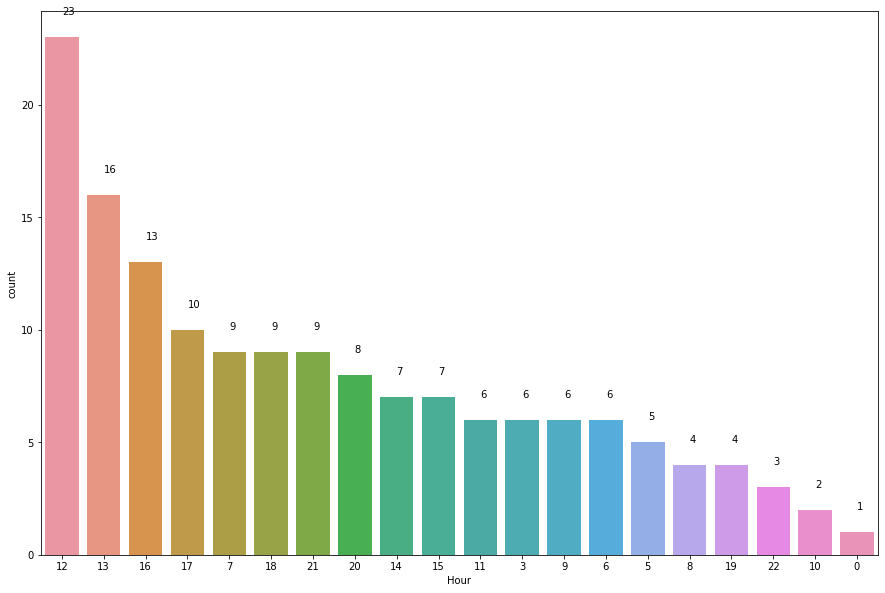

In [34]:
hour_plot = pd.crosstab(data.Hour, data['is_fraud'])
plt.figure(figsize=(15,10))
countplot(x='Hour',df=fraud_data)

### Insights:

#### Hightest amount of fraud transactions are commited during:
* Afternoon 12 and 13 hour of the day. 
* Evening 16 and 17 hour of the day.

In [35]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud',
       'Year', 'Month', 'Day', 'Hour', 'Day_of_week'],
      dtype='object')

## ML Modelling

You are expected to create a robust fraud detection framework by engineering new features, tuning, and improving the baseline ML model performance.

### Recommendations to the business
● What are your recommendations for IndAvenue?

● Any final visualizations you would use to convey your recommendations?

● Can you explain your ML model using non-technical terms?

● Which simple strategies would you use to ensure fast customer checkout?

In [36]:
data.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
Year                            2
Month                           4
Day                            31
Hour                           24
Day_of_week                     7
dtype: int64

In [37]:
# Lets drop some unnecessary columns

data = data.drop(['transaction_number','user_id','transaction_initiation', 'country'],
                 axis = 1)

In [38]:
data.head()

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,Year,Month,Day,Hour,Day_of_week
0,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,2016,11,15,19,Tuesday
1,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,11,9,Wednesday
2,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,7,7,Wednesday
3,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,11,16,Wednesday
4,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,16,17,Wednesday


In [39]:
data.dtypes

payment_method                object
partner_id                  category
partner_category              object
device_type                   object
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Day_of_week                   object
dtype: object

In [40]:
# Lets split the data into train and test

X = data.drop(['is_fraud'], axis = 1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
cat_col = []                        # Empty list for adding categorical column names                          
for names in X_train.columns:
    if X_train[names].dtype != 'float64':    # use if necessary ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        cat_col.append(names)

In [42]:
cat_col

['payment_method',
 'partner_id',
 'partner_category',
 'device_type',
 'partner_pricing_category',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Day_of_week']

In [43]:
num_col = ['money_transacted']    # only numeric col in data

In [44]:
scalar = StandardScaler()

scalar.fit(X_train[num_col])                       # fit the data

# X_train_num = scalar.transform(X_train[num_col])       # transforming the data 
# X_test_num = scalar.transform(X_test[num_col])

X_train_num = pd.DataFrame(scalar.transform(X_train[num_col]), columns=num_col)   # transaforming and creating a table
X_test_num = pd.DataFrame(scalar.transform(X_test[num_col]), columns=num_col)

In [45]:
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X_train[cat_col])

columns_ohe = list(ohe.get_feature_names(cat_col))

print(columns_ohe)


['payment_method_e_wallet_payments', 'payment_method_other_debit_cards', 'payment_method_sbi_atm_cum_debit_card', 'payment_method_unified_payments_interface', 'payment_method_visa_master_credit_cards', 'payment_method_visa_master_debit_cards', 'partner_id_7889', 'partner_id_15778', 'partner_id_23667', 'partner_id_31556', 'partner_id_39445', 'partner_id_47334', 'partner_id_55223', 'partner_id_63112', 'partner_id_71001', 'partner_id_78890', 'partner_id_86779', 'partner_id_94668', 'partner_id_102557', 'partner_id_110446', 'partner_id_118335', 'partner_id_126224', 'partner_id_149891', 'partner_id_157780', 'partner_id_165669', 'partner_id_173558', 'partner_id_181447', 'partner_id_189336', 'partner_id_213003', 'partner_category_cat_1', 'partner_category_cat_2', 'partner_category_cat_3', 'partner_category_cat_4', 'partner_category_cat_5', 'partner_category_cat_6', 'partner_category_cat_7', 'partner_category_cat_8', 'partner_category_cat_9', 'device_type_android_devices', 'device_type_ios_devi

In [46]:
X_train.shape

(53570, 11)

In [47]:
X_train_cat = ohe.transform(X_train[cat_col])
X_test_cat = ohe.transform(X_test[cat_col])

In [48]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [49]:
X_train_cat.head()

,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_id_7889,partner_id_15778,partner_id_23667,partner_id_31556,...,Hour_21,Hour_22,Hour_23,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [51]:
X_train.head()

,money_transacted,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_id_7889,partner_id_15778,partner_id_23667,...,Hour_21,Hour_22,Hour_23,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,-0.060635,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.014313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.096385,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.055965,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.108795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
X_train.isna().sum()

money_transacted                             0
payment_method_e_wallet_payments             0
payment_method_other_debit_cards             0
payment_method_sbi_atm_cum_debit_card        0
payment_method_unified_payments_interface    0
                                            ..
Day_of_week_Saturday                         0
Day_of_week_Sunday                           0
Day_of_week_Thursday                         0
Day_of_week_Tuesday                          0
Day_of_week_Wednesday                        0
Length: 115, dtype: int64

<br>
<br>


## Evaluation Metric

● The evaluation metric for this hackathon is the F1 Score

<br>

<br>


In [53]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [54]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [55]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred_train = clf_lr.predict(X_train)
y_pred_test = clf_lr.predict(X_test)

print("F1 score :", f1_score(y_train,y_pred_train, average='weighted'))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("F1 score :",f1_score(y_test,y_pred_test, average='weighted'))
# print("Test Classification Report:")
# print(classification_report(y_test,y_pred_test,digits=4))


F1 score : 0.9983800563406556
F1 score : 0.997896411709198


In [56]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9989    0.9997    0.9993     53464
           1     0.7302    0.4340    0.5444       106

    accuracy                         0.9986     53570
   macro avg     0.8645    0.7168    0.7718     53570
weighted avg     0.9983    0.9986    0.9984     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9986    0.9995    0.9991     22911
           1     0.5862    0.3542    0.4416        48

    accuracy                         0.9981     22959
   macro avg     0.7924    0.6768    0.7203     22959
weighted avg     0.9978    0.9981    0.9979     22959



In [57]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Logistic_regression",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.99838,0.998127,0.998127,0.997786,0.997896


### Decision Tree

In [58]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("F1 score :", f1_score(y_train,y_pred_train, average='weighted'))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("F1 score :",f1_score(y_test,y_pred_test, average='weighted'))
# print("Test Classification Report:")
# print(classification_report(y_test,y_pred_test,digits=4))


F1 score : 0.9997193303176459
F1 score : 0.9992633583066125


In [59]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     53464
           1     0.9333    0.9245    0.9289       106

    accuracy                         0.9997     53570
   macro avg     0.9666    0.9622    0.9644     53570
weighted avg     0.9997    0.9997    0.9997     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     22911
           1     0.8163    0.8333    0.8247        48

    accuracy                         0.9993     22959
   macro avg     0.9080    0.9165    0.9122     22959
weighted avg     0.9993    0.9993    0.9993     22959



In [60]:
print(confusion_matrix(y_test, y_pred_test))

[[22902     9]
 [    8    40]]


In [61]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTrees",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263


In [62]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=X_train, y=y_train)

y_pred_train = clf_rf.predict(X_train)
print("F1 score:",f1_score(y_train,y_pred_train, average='weighted'))

y_pred_test = clf_rf.predict(X_test)
print("F1 score:",f1_score(y_test,y_pred_test, average='weighted'))


F1 score: 1.0
F1 score: 0.9990381051015551


In [63]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     53464
           1     1.0000    1.0000    1.0000       106

    accuracy                         1.0000     53570
   macro avg     1.0000    1.0000    1.0000     53570
weighted avg     1.0000    1.0000    1.0000     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9993    0.9997    0.9995     22911
           1     0.8462    0.6875    0.7586        48

    accuracy                         0.9991     22959
   macro avg     0.9227    0.8436    0.8791     22959
weighted avg     0.9990    0.9991    0.9990     22959



In [64]:
print(confusion_matrix(y_test, y_pred_test))

[[22905     6]
 [   15    33]]


In [65]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263
2,RandomForest,1.000000,1.000000,1.000000,1.000000,0.999085,0.999085,0.999025,0.999038


In [66]:
rfc_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [10, 15, 20,25],
           "max_depth" : [10, 15, 20, 25, 30],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

In [67]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [10, 15, 20, 25]})

In [68]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.9991039761060294 {'max_depth': 25, 'min_samples_leaf': 2, 'n_estimators': 25}


In [69]:
#  0.9991039761060294 {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 25}

In [70]:
y_pred_train = rfc_cv_grid.predict(X_train)
y_pred_test = rfc_cv_grid.predict(X_test)

print("F1 score :",f1_score(y_train,y_pred_train, average='weighted'))
print("F1 score :",f1_score(y_test,y_pred_test, average='weighted'))


F1 score : 0.9995519743128595
F1 score : 0.9989335129895012


In [71]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     53464
           1     0.9663    0.8113    0.8821       106

    accuracy                         0.9996     53570
   macro avg     0.9830    0.9056    0.9409     53570
weighted avg     0.9996    0.9996    0.9996     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9993    0.9997    0.9995     22911
           1     0.8378    0.6458    0.7294        48

    accuracy                         0.9990     22959
   macro avg     0.9185    0.8228    0.8645     22959
weighted avg     0.9989    0.9990    0.9989     22959



In [72]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263
2,RandomForest,1.000000,1.000000,1.000000,1.000000,0.999085,0.999085,0.999025,0.999038
3,RandomForest_BestParameters,0.999571,0.999571,0.999560,0.999552,0.998998,0.998998,0.998921,0.998934


In [73]:
clf_rf.feature_importances_

array([6.08855637e-01, 1.71766530e-03, 1.41584767e-02, 7.02441273e-04,
       0.00000000e+00, 1.58631094e-02, 1.28124445e-02, 1.28181396e-04,
       1.07776355e-04, 1.78216633e-03, 7.13600903e-05, 1.41538368e-03,
       5.05770784e-04, 1.07137794e-04, 9.75195896e-06, 3.17048037e-03,
       2.06108588e-03, 2.01361557e-04, 0.00000000e+00, 1.96333633e-03,
       2.99257370e-04, 7.63466724e-03, 0.00000000e+00, 1.66859116e-05,
       2.04497192e-05, 2.21287110e-03, 8.42635082e-04, 0.00000000e+00,
       9.18238159e-05, 0.00000000e+00, 3.72998270e-03, 3.10194776e-03,
       1.84748232e-03, 2.74762603e-04, 2.53497005e-04, 9.02134541e-06,
       3.57880665e-05, 2.36897866e-03, 0.00000000e+00, 1.42306570e-03,
       4.54176485e-05, 1.97386850e-03, 1.42795340e-03, 2.05184041e-02,
       1.77740848e-03, 8.39532370e-03, 6.69071264e-04, 5.00055144e-03,
       5.49921181e-03, 8.02885155e-03, 6.36482408e-03, 3.54429615e-03,
       8.73102121e-03, 4.83358194e-03, 2.74117628e-03, 1.74198483e-03,
      

In [74]:
len(X_train.columns)

115

In [75]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 27  38  18   4  22  29  86  35  14  84  23  24  36  40  85  10  28  13
   8   7  88  77  17 107  34  33  20  57  83  12  81  46  60   3  66  70
 106  26  68  78 103  59  80  11  39  42  65   1  55  61  44   9  32  19
  41  16  63  94  89  25  37  67  54  74  75  98  31  93  58  15 102  82
  73  51 108  72  30  69  56 111  53  79  92  47 114  71  95  48  64  62
  90 101  50 112 109  76  99  91  21 110 100  49  45  87  52 105 113 104
  97  96   6   2   5  43   0]


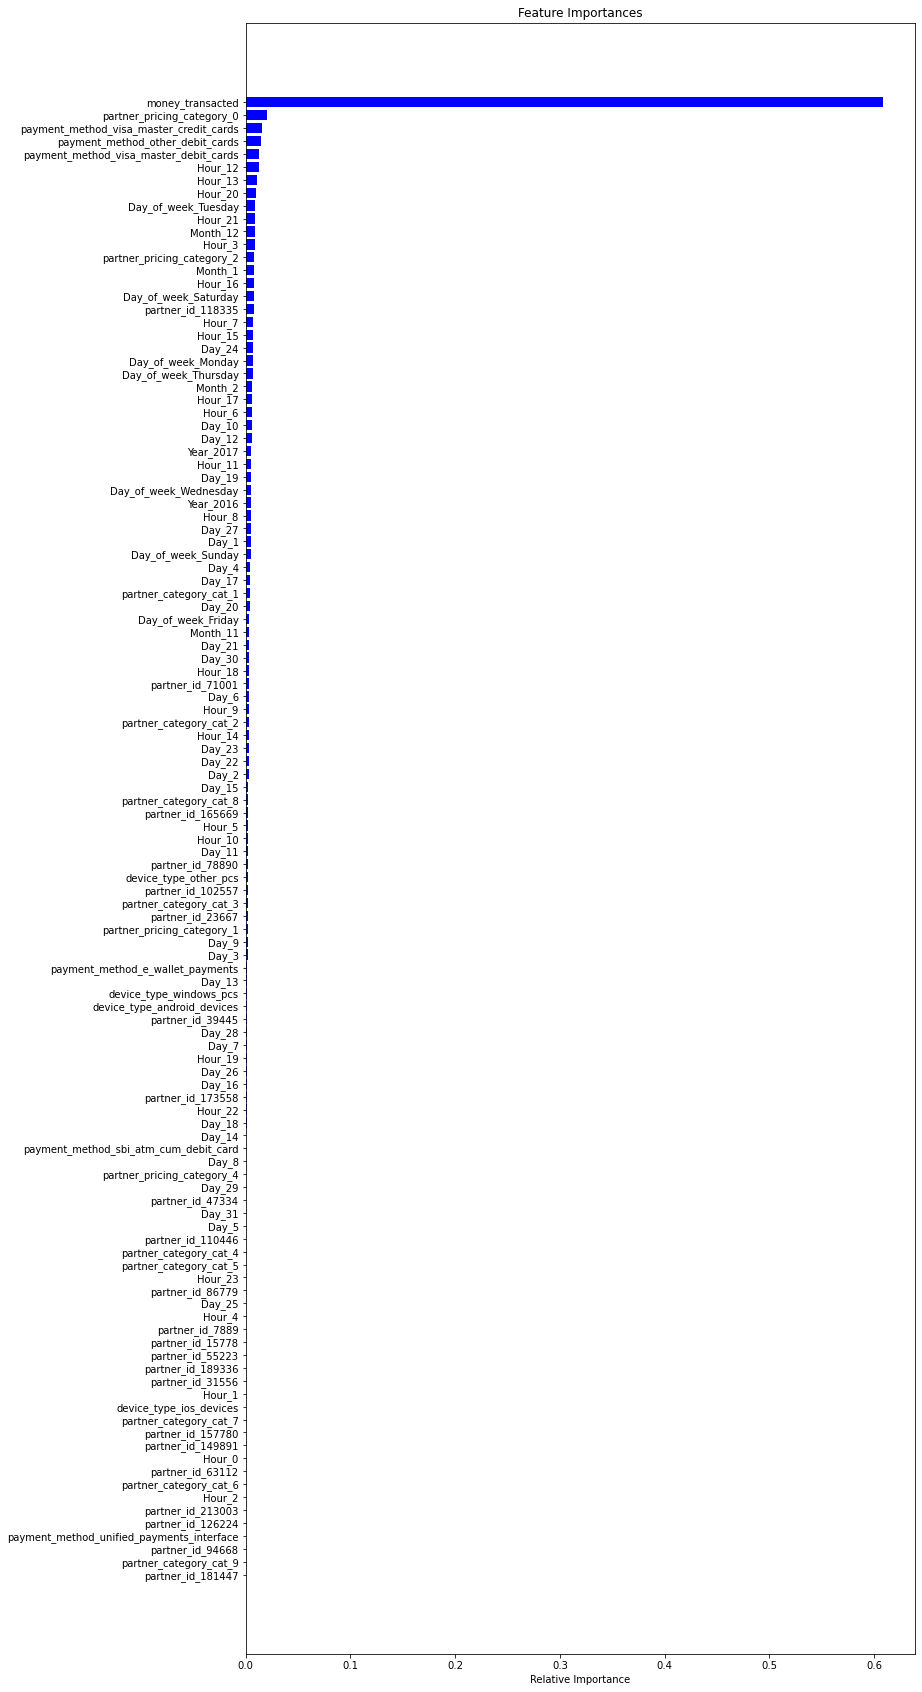

In [76]:
%matplotlib inline
features = X_train.columns
plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

### Insights:

* `Money Transacted` is the most important column in the data set

In [77]:
# Create adaboost-decision tree classifer object
clf_adaboost =  AdaBoostClassifier(n_estimators = 100,
    learning_rate = 0.4)

clf_adaboost.fit(X_train, y_train)

y_pred_train = clf_adaboost.predict(X_train)
y_pred_test = clf_adaboost.predict(X_test)

print("F1 Score:",f1_score(y_train,y_pred_train, average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_test, average='weighted'))


F1 Score: 0.9995385728308656
F1 Score: 0.9994599410055295


In [78]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     53464
           1     0.9362    0.8302    0.8800       106

    accuracy                         0.9996     53570
   macro avg     0.9679    0.9150    0.9399     53570
weighted avg     0.9995    0.9996    0.9995     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     22911
           1     0.9286    0.8125    0.8667        48

    accuracy                         0.9995     22959
   macro avg     0.9641    0.9062    0.9332     22959
weighted avg     0.9995    0.9995    0.9995     22959



In [79]:
print(confusion_matrix(y_test,y_pred_test))

[[22908     3]
 [    9    39]]


In [80]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263
2,RandomForest,1.000000,1.000000,1.000000,1.000000,0.999085,0.999085,0.999025,0.999038
3,RandomForest_BestParameters,0.999571,0.999571,0.999560,0.999552,0.998998,0.998998,0.998921,0.998934
4,Adaboost,0.999552,0.999552,0.999538,0.999539,0.999477,0.999477,0.999459,0.999460


In [81]:
f1_score(y_train, y_pred_train, average='weighted')

0.9995385728308656

In [82]:
# Create XGBoost-decision tree classifer object
XGB_model = XGBClassifier(n_estimators=600, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)

y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

print("F1 Score:",f1_score(y_train,y_pred_train, average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_test, average='weighted'))

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 21s
F1 Score: 0.9998106150733418
F1 Score: 0.9994182484573267


In [83]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999     53464
           1     0.9800    0.9245    0.9515       106

    accuracy                         0.9998     53570
   macro avg     0.9899    0.9622    0.9757     53570
weighted avg     0.9998    0.9998    0.9998     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     22911
           1     0.9070    0.8125    0.8571        48

    accuracy                         0.9994     22959
   macro avg     0.9533    0.9062    0.9284     22959
weighted avg     0.9994    0.9994    0.9994     22959



In [84]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263
2,RandomForest,1.000000,1.000000,1.000000,1.000000,0.999085,0.999085,0.999025,0.999038
3,RandomForest_BestParameters,0.999571,0.999571,0.999560,0.999552,0.998998,0.998998,0.998921,0.998934
4,Adaboost,0.999552,0.999552,0.999538,0.999539,0.999477,0.999477,0.999459,0.999460
5,XGBoost,0.999813,0.999813,0.999811,0.999811,0.999434,0.999434,0.999414,0.999418


In [85]:
importances = XGB_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 57  79  78  77  75  74  73  72  71  70  69  68  67  66  65  63  61  60
  59  58 111  55  80  81  82  83 108 107 106 105 103 102 101  99  98  97
  54  95  93  92  91  90  89  88  87  86  85  84  94  51  56  25  33  32
  13  30  14  29  28  34  27  15  24  23  22  16  20  19  26  18  35  37
   1   3  48   4   7   8  36  44  42  10  11  12  40  39  38  17  43 100
 112  21  45   9  96  47  52 104 113   2 110  31  62 109  76  49  46  41
   5   6  53  50  64 114   0]


In [86]:
%matplotlib inline
features = X_train.columns
plt.figure(figsize=(144,144))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 50)
plt.xlabel('Relative Importance')

plt.show()

In [87]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [88]:
%time GBM_model.fit(X=X_train, y=y_train)

Wall time: 10.1 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [89]:
y_pred_train = GBM_model.predict(X_train)
y_pred_test = GBM_model.predict(X_test)

In [90]:
print("F1 Score:",f1_score(y_train,y_pred_train, average='weighted' ))
print("F1 Score:",f1_score(y_test,y_pred_test,  average='weighted' ))

F1 Score: 0.9992833541415413
F1 Score: 0.9990038527841224


In [91]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9993    0.9996     53464
           1     0.7372    0.9528    0.8313       106

    accuracy                         0.9992     53570
   macro avg     0.8686    0.9761    0.9154     53570
weighted avg     0.9994    0.9992    0.9993     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9993    0.9995     22911
           1     0.7069    0.8542    0.7736        48

    accuracy                         0.9990     22959
   macro avg     0.8533    0.9267    0.8865     22959
weighted avg     0.9991    0.9990    0.9990     22959



In [92]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic_regression,0.998563,0.998563,0.998347,0.998380,0.998127,0.998127,0.997786,0.997896
1,DecisionTrees,0.999720,0.999720,0.999719,0.999719,0.999260,0.999260,0.999268,0.999263
2,RandomForest,1.000000,1.000000,1.000000,1.000000,0.999085,0.999085,0.999025,0.999038
3,RandomForest_BestParameters,0.999571,0.999571,0.999560,0.999552,0.998998,0.998998,0.998921,0.998934
4,Adaboost,0.999552,0.999552,0.999538,0.999539,0.999477,0.999477,0.999459,0.999460
5,XGBoost,0.999813,0.999813,0.999811,0.999811,0.999434,0.999434,0.999414,0.999418
6,GBM,0.999235,0.999235,0.999387,0.999283,0.998955,0.998955,0.999082,0.999004



<br>

# Prediction on Test Data

<br>

In [93]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [94]:
test_data.shape        # dimension of data

(19133, 10)

In [95]:
test_data.info()         # dtypes and no. of data points present in that specific column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        19133 non-null  int64  
 1   user_id                   19133 non-null  int64  
 2   payment_method            19133 non-null  object 
 3   partner_id                19133 non-null  int64  
 4   partner_category          19133 non-null  object 
 5   country                   19133 non-null  object 
 6   device_type               19133 non-null  object 
 7   money_transacted          19133 non-null  float64
 8   transaction_initiation    19133 non-null  object 
 9   partner_pricing_category  19133 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


In [96]:
# Transaction_initiation column should be a datatime Datatype. 

test_data['transaction_initiation'] = pd.to_datetime(test_data['transaction_initiation'])

In [97]:
test_data['Year'] = test_data['transaction_initiation'].dt.year
test_data['Month'] = test_data['transaction_initiation'].dt.month
test_data['Day'] = test_data['transaction_initiation'].dt.day
test_data['Hour'] = test_data['transaction_initiation'].dt.hour
test_data['Day_of_week'] = test_data['transaction_initiation'].dt.day_name()

In [98]:
# Lets drop some unnecessary columns

test_data.drop(['transaction_number','user_id','country','transaction_initiation'],axis=1,inplace=True)

In [99]:
test_data.head()

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,Year,Month,Day,Hour,Day_of_week
0,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28,14,Wednesday
1,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14,17,Wednesday
2,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21,10,Saturday
3,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16,13,Monday
4,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9,12,Thursday


In [100]:
test_data_num = pd.DataFrame(scalar.transform(test_data[num_col]), columns=num_col)   # transaforming and creating a table



In [101]:
my_list=test_data.columns

In [102]:
my_list

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'Year', 'Month', 'Day',
       'Hour', 'Day_of_week'],
      dtype='object')

In [103]:
test_data[my_list]=test_data[my_list].astype('category')

In [104]:
test_data_num = pd.DataFrame(scalar.transform(test_data[num_col]), columns=num_col)
test_data_cat = ohe.transform(test_data[cat_col])
test_data_cat = pd.DataFrame(test_data_cat.todense(), columns=columns_ohe)

In [105]:
test_data = pd.concat([test_data_num, test_data_cat], axis=1)

In [106]:
test_data.shape

(19133, 115)

In [107]:
final_predictions = XGB_model.predict(test_data)

In [108]:
final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
sample_sub = pd.read_csv('sample_submission.csv')

In [110]:
sample_sub.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [111]:
sample_sub.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [112]:
sample_sub['is_fraud'] = final_predictions

In [113]:
sample_sub['is_fraud'].value_counts()

0    19097
1       36
Name: is_fraud, dtype: int64

In [114]:
sample_sub.to_csv('Vishal_Mandhani.csv', index = False)

In [115]:
### Insights :
    
# * Logistc regression can predict 24 fraudulent transactions.
# * Decision Tree predicted 30 fraudulent transactions.
# * Random Forest predicted  34 fraudulent transactions.
# * Adaboost predicted 31 fraudulent transactions.
# * XG Boost predicted 36 fraudulent transactions.